In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [13]:
class Model(nn.Module):
    
    def __init__(self, inp_features=4, h1=6, h2=7, h3=8, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(inp_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        
        return x

In [53]:
torch.manual_seed(32)
model = Model()

In [56]:
try:
    df = pd.read_csv('../PYTORCH_NOTEBOOKS/Data/Iris.csv')
except FileNotFoundError:
    df = pd.read_csv('Iris.csv')
    
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


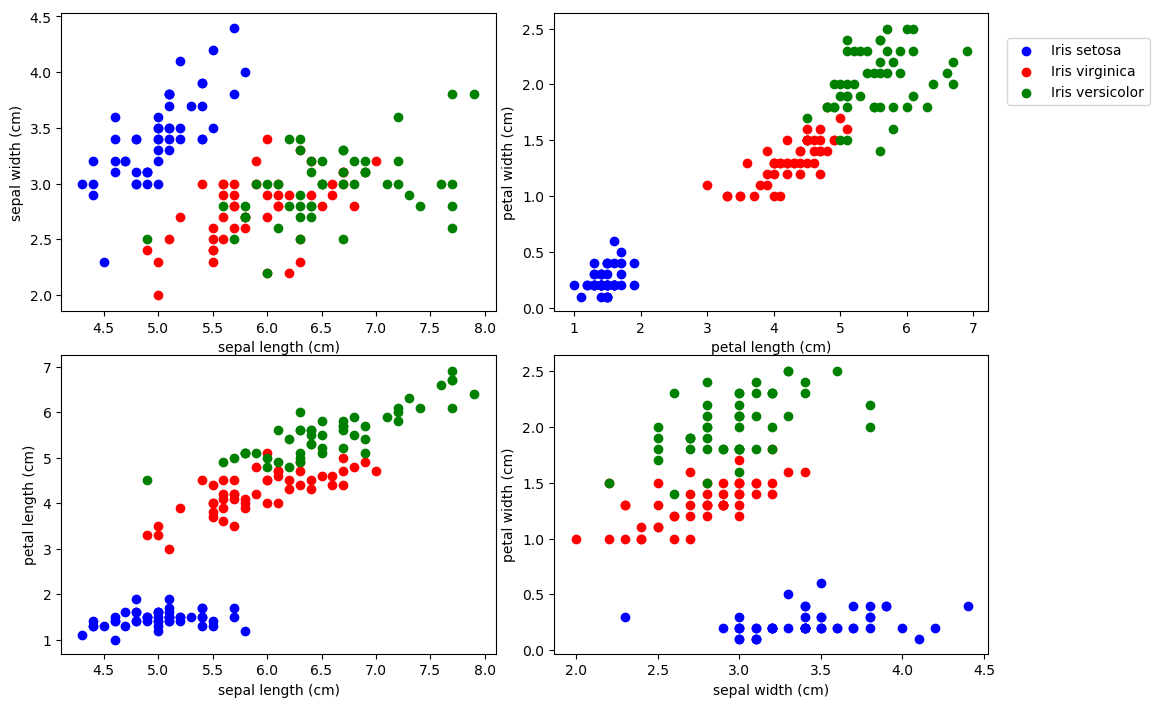

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [37]:
X = df.drop('target', axis=1).values
Y = df['target'].values


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [39]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [41]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, Y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch:  1  loss: 1.15363753
epoch: 11  loss: 0.95491755
epoch: 21  loss: 0.74568695
epoch: 31  loss: 0.56627584
epoch: 41  loss: 0.40506843
epoch: 51  loss: 0.25530988
epoch: 61  loss: 0.12251235
epoch: 71  loss: 0.07668459
epoch: 81  loss: 0.06552480
epoch: 91  loss: 0.05960809


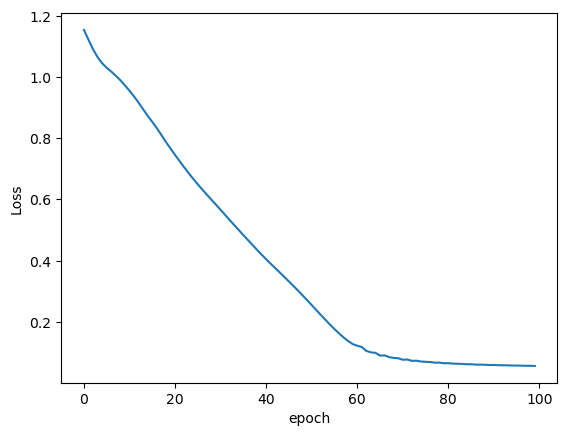

In [42]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [44]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, Y_test)
print(f'{loss:.8f}')

0.05473383


In [49]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {Y_test[i]}')
        if y_val.argmax().item() == Y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(Y_test)} = {100*correct/len(Y_test):.2f}% correct')

 1. tensor([-4.5937,  5.1135, -1.2435])     1
 2. tensor([-4.4740,  5.9302, -2.0112])     1
 3. tensor([  8.2414,   2.3632, -10.8264])  0
 4. tensor([-7.4373,  4.9762,  1.0279])     1
 5. tensor([-12.3809,   3.6256,   5.8988])  2
 6. tensor([-19.7664,   2.0163,  12.8370])  2
 7. tensor([  8.6123,   2.5229, -11.3361])  0
 8. tensor([  8.5332,   2.4889, -11.2275])  0
 9. tensor([-12.8202,   3.7881,   6.0976])  2
10. tensor([-16.6150,   3.1675,   9.4914])  2
11. tensor([-17.6313,   2.8854,  10.4965])  2
12. tensor([  7.6810,   2.1219, -10.0563])  0
13. tensor([-16.8289,   2.7178,  10.0265])  2
14. tensor([-7.1999,  4.8278,  0.9709])     1
15. tensor([-14.2463,   3.6016,   7.3340])  2
16. tensor([-4.3055,  5.6965, -1.9454])     1
17. tensor([-10.4212,   3.9288,   4.1604])  2
18. tensor([  8.6565,   2.5420, -11.3969])  0
19. tensor([-7.0513,  5.0946,  0.6372])     1
20. tensor([-13.8844,   4.2190,   6.5481])  2
21. tensor([  8.2784,   2.3792, -10.8773])  0
22. tensor([  9.3835,   2.8562, -1

In [68]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')
torch.save(model, 'IrisClassifier.pt')

In [62]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=7, bias=True)
  (fc3): Linear(in_features=7, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

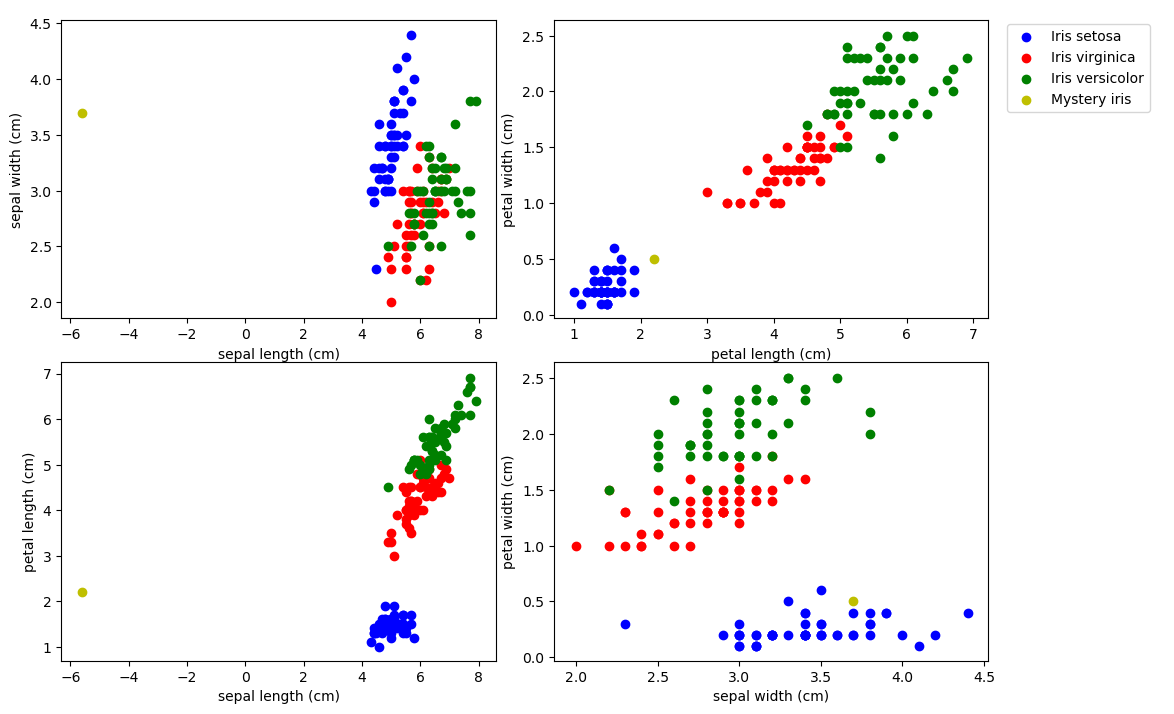

In [65]:
mystery_iris = torch.tensor([-5.6,3.7,2.2,0.5])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [67]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([-0.3070, -0.3487,  0.0703])

Iris versicolor
